# Credit Card Fraud Detection

Credit card fraud detection involves various tools to verify transactions, techniques to authenticate cardholders and technologies, such as statistical analysis and machine learning, to monitor suspicious transactions and activities.

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

#### Features: 
1. id : unique identifier for each transaction
2. V1-V28 : Anonymized features representing varioue transaction attributes (e.g. time, location etc.)
3. Amount : The transaction amount
4. Class : Binary label indicating whether the transaction is fraudulent or not. (For fraudulent : 1, not fraudulent : 0)

#### Use cases: 
Credit card fraud detection: Build a macgine learning model to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.

Marchant category analysis: Examine how different merchant categories associated with fraud.

Transaction type analysis: Analyze whether certain types of transactions are more prone to fraud than others.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### 2. Load Dataset

In [3]:
data = pd.read_csv('creditcard_2023.csv')

### 3. Description of data

In [4]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

#### Observations: 
1.  There are 568630 rows and 31 columns in the dataset.
2.  All the feature variables are numeric type.
3.  Memory usage is 134.5 mb
4.  'Class' is a output variable indicating whether the transaction is fradulent or not.

In [6]:
# display statistical information about numerical columns.
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [7]:
# check any missing values
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.duplicated().any()

False

Observations:
1. No missing values.
2. No duplicate values.


### 4. Exploratory Data Analysis:

In [10]:
# correlation between numeric columns
data.corr()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


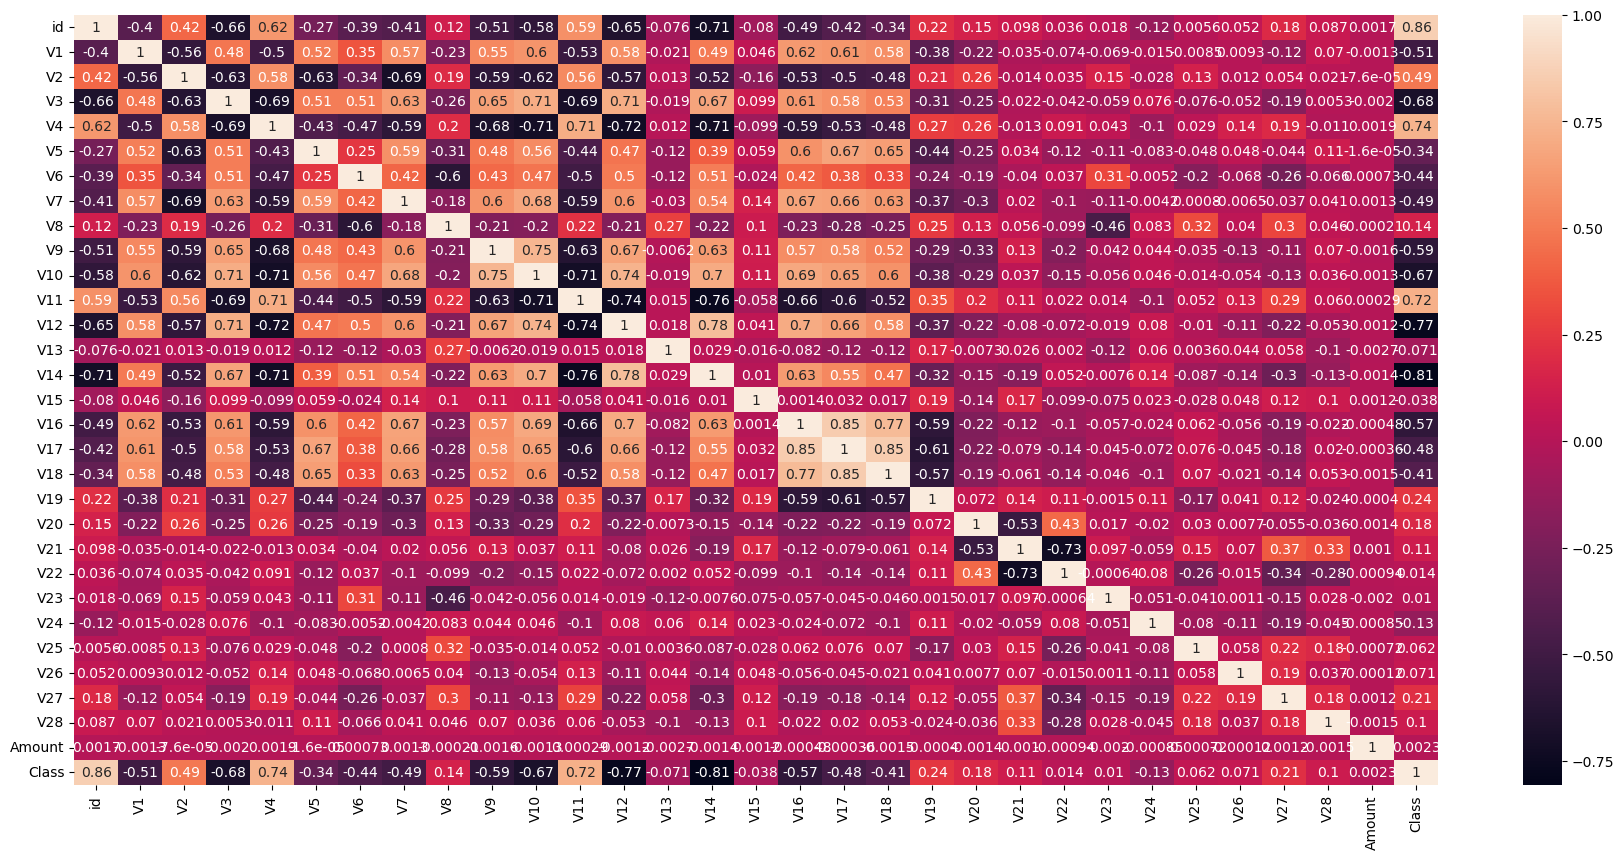

In [11]:
# Draw heatmap for this correlation
plt.figure(figsize = (22,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

#### Observations:
1. A variable when correlate to the same variable gives value 1.
2. v9 and v10 are positively correlated.
3. v16, v17, v18 are highly correlated.
4. v12 is negatively coorelates with v11.

In [12]:
# find skewness of the features
data.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

Observations:
1. v1, v23 are highly negatively correlated.


<Axes: >

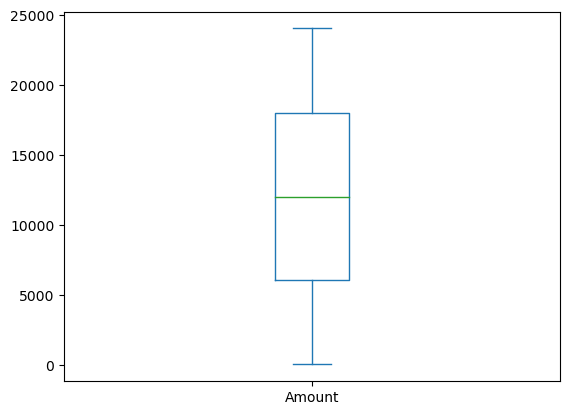

In [13]:
# distribution of amount feature.
data['Amount'].plot.box()

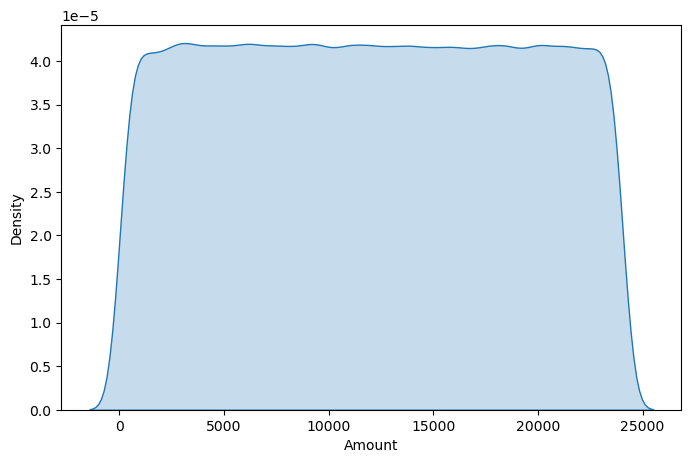

In [14]:
plt.figure(figsize = (8,5))
sns.kdeplot(data = data['Amount'], shade = True)
plt.show()

Observations: 
1. Amiunt is normally distributed.


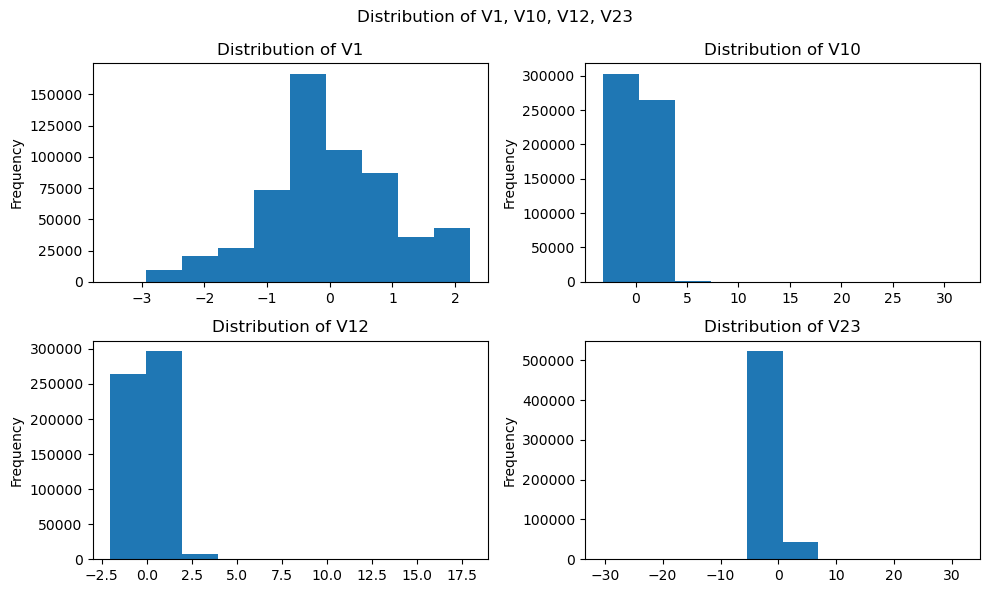

In [15]:
# Distribution for faeture variables v1, v10, v12, v23
fig, ax = plt.subplots(2,2, figsize = (10,6))
data['V1'].plot(kind = 'hist', ax = ax[0,0], title = 'Distribution of V1')
data['V10'].plot(kind = 'hist', ax = ax[0,1], title = 'Distribution of V10')
data['V12'].plot(kind = 'hist', ax = ax[1,0], title = 'Distribution of V12')
data['V23'].plot(kind = 'hist', ax = ax[1,1], title = 'Distribution of V23')
plt.suptitle('Distribution of V1, V10, V12, V23')
plt.tight_layout()
plt.show()

In [16]:
# let's check output variable
data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

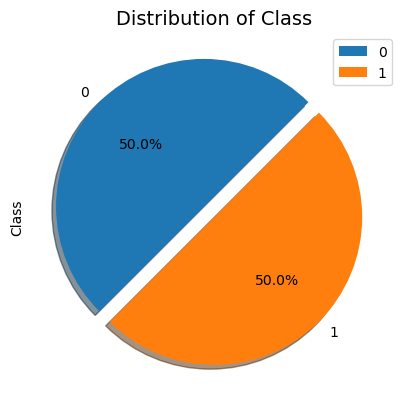

In [17]:
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

Observations: 
1. 50% data is for fradulent and 50% is for non fradulent, it menas target varibles are equally balanced.

#### 5. Data Preprocessing:
In this step data is transformed if it is needed, remove unwanted data before data is anlyzed.

In this dataset all the variables are needed , so we dont remove it, and all the varibles are numerical so dont nedd to transformed it.

In [18]:
# Divide the datset into x independent, y dependent variables
x = data.drop(['id','Class'], axis = 1)
y = data.Class

In [19]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [20]:
print('Shape of x: ',x.shape)
print('Shape of y: ', y.shape)

Shape of x:  (568630, 29)
Shape of y:  (568630,)


In [21]:
# here we have to standarized our fetaure varibles values so all the values becomes on same scale
# here i have to use standard scaler

In [22]:
sc = StandardScaler()

In [23]:
x_scaled = sc.fit_transform(x)

In [24]:
# convert x_scaled array into dataframe
x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)

In [25]:
x_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


### 6. Modelling:
Split our dataset into training and testing dataset

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df,y, test_size = 0.30, random_state = 15)

#### Logistic Regression model

In [27]:
# Build a logistic regression model.
lr = LogisticRegression()

In [28]:
lr.fit(x_train, y_train)

LogisticRegression()

In [29]:
# Define a function for checking model training and testing accuracy,classification report, confusion matrix

def model_evaluation(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    conf_matix = confusion_matrix(actual, predicted)
    class_report = classification_report(actual, predicted)
    print("Model accuracy: ", round(acc_score, 2))
    print("Classification Report: \n", class_report)
    print("Confusion Matrix: \n", conf_matix)

In [30]:
pred_lr_train = lr.predict(x_train)
pred_lr_test = lr.predict(x_test)

In [31]:
print('**********Training Accuracy**********')
model_evaluation(y_train, pred_lr_train)

**********Training Accuracy**********
Model accuracy:  0.97
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97    199073
           1       0.98      0.95      0.96    198968

    accuracy                           0.97    398041
   macro avg       0.97      0.97      0.97    398041
weighted avg       0.97      0.97      0.97    398041

Confusion Matrix: 
 [[194775   4298]
 [  9587 189381]]


In [32]:
print("**********Testing Accuracy**********")
model_evaluation(y_test, pred_lr_test)

**********Testing Accuracy**********
Model accuracy:  0.96
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     85242
           1       0.98      0.95      0.96     85347

    accuracy                           0.96    170589
   macro avg       0.97      0.96      0.96    170589
weighted avg       0.97      0.96      0.96    170589

Confusion Matrix: 
 [[83387  1855]
 [ 4158 81189]]


#### Observations: 
1. Logistic regression model shows testing accuracy is 96% and training accuracy is 97%.

#### Decision Tree model:

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
pred_dtree_train = dtree.predict(x_train)
pred_dtree_test = dtree.predict(x_test)

In [36]:
print('**********Training Accuracy**********')
model_evaluation(y_train, pred_dtree_train)

**********Training Accuracy**********
Model accuracy:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199073
           1       1.00      1.00      1.00    198968

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041

Confusion Matrix: 
 [[199073      0]
 [     0 198968]]


In [37]:
print('**********Testing Accuracy**********')
model_evaluation(y_test, pred_dtree_test)

**********Testing Accuracy**********
Model accuracy:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85242
           1       1.00      1.00      1.00     85347

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix: 
 [[84927   315]
 [  119 85228]]


Observations:
1. Decision tree model giving 100% accuracy.

#### 3. Random Forest Model: 

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
pred_rf_train = rf.predict(x_train)
pred_rf_test = rf.predict(x_test)

In [ ]:
print('**********Training Accuracy**********')
model_evaluation(y_train, pred_rf_train)

In [ ]:
print('**********Testing Accuracy**********')
model_evaluation(y_test, pred_rf_test)